# Ejercicios Beautiful Soup

### Enunciado - Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

Realizará una solicitud HTTP GET a la siguiente url. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

"coche": Nombres de los coches.

"precio_rebajado": Precios rebajados.

"precio_original": Precios originales.

"km": Kilómetros recorridos.

Retornará el DataFrame resultante.

In [18]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import numpy as np

In [5]:
#Hago la llamada a la web de coches de ocasión
res_coches_ocasion = requests.get("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")

print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")

La respuesta a tu peticion es 200


<bound method Tag.prettify of <!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="font" crossorigin="" href="/hera/_next/static/media/351a934e96d2300f-s.p.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/hera/_next/static/media/e1c529c04de64b40-s.p.woff2" rel="preload" type="font/woff2"/><link as="image" href="/hera/icons/home.svg" rel="preload"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" href="/hera/icons/filters/filter.svg" rel="preload"/><link as="image" href="/hera/icons/ribbon.svg" rel="preload"/><link as="image" href="/hera/icons/favourite.svg" rel="preload"/><link as="image" href="/hera/icons/C.svg" rel="preload"/><link as="image" href="/hera/icons/B.svg" rel="preload"/><link as="image" fetchpriority="high" href="/hera/icons/adSell.svg" rel="preload"/>
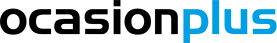

In [6]:
#Extraigo el html
sopa_coches_ocasion = BeautifulSoup(res_coches_ocasion.content, "html.parser")
sopa_coches_ocasion.prettify

In [7]:
#Busco la lista de nombres que incluye otros datos, como precios.
nombre_coches = sopa_coches_ocasion.find_all("span",{"class":"cardVehicle_spot__e6YZx"})
lista_nombres = []
for nombre in nombre_coches:
    lista_nombres.append(nombre.getText())
lista_nombres[:4]

['Hyundai i20', '10.500€', 'Renault Espace', '504€']

In [38]:
#Limpio la lista y me quedo solo con los nombres de los vehículos.
lista_nombres_sin_numeros = [nombre for nombre in lista_nombres if not re.search(r'€$', nombre.strip())]
lista_nombres_sin_numeros[:4]

['Hyundai i20', 'Renault Espace', 'Peugeot 2008', 'Seat León']

In [37]:
#Creo otra lista para guardar solo los valores numéricos.
#No logro que me apendee correctamente los valores nulos como '€' por lo que de esta forma nunca podré crear el data frame.
lista_precio_original_sin_nombres = []
for precio in lista_nombres:
    if re.search(r'€$', precio.strip()):
        lista_precio_original_sin_nombres.append(precio)
    elif precio is None:
        lista_precio_original_sin_nombres.append('€')

lista_precio_original_sin_nombres[:4]

['10.500€', '504€', '20.990€', '15.350€']

In [35]:
#Creo lista para guardar los kilómetros.
kms = sopa_coches_ocasion.find_all("span", {"class": "characteristics_elements__Mb1S_"})
lista_kms = []
for km in kms:
    km_texto = km.getText()
    if re.search(r'Km$', km.getText() ):
        lista_kms.append(km.getText())
lista_kms [:4]


['106.668 Km', '53.630 Km', '39.768 Km', '28.948 Km']

In [36]:
#Creo la última lista para guardar los precios rebajados.
lista_precios_rebajados = sopa_coches_ocasion.find_all("span", {"class":"cardVehicle_finance__SG6JV"})
lista_precios_rebajados
precios_rebajados = []
for precio in lista_precios_rebajados:
    precios_rebajados.append(precio.getText())
precios_rebajados[:4]
lista_solo_precios_rebajados = [precio for precio in precios_rebajados if re.search(r'€$', precio.strip())]
lista_solo_precios_rebajados[:4]


['9.545€', '20.263€', '19.081€', '9.790€']

In [45]:
#Creo la función para extraer todos los datos a la vez.
def scrape_coches_ocasion(url):
    
    res_coches_ocasion = requests.get(url)
    print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")

    sopa_coches_ocasion = BeautifulSoup(res_coches_ocasion.content, "html.parser")

    nombre_coches = sopa_coches_ocasion.find_all("span",{"class":"cardVehicle_spot__e6YZx"})
    lista_nombres_sin_numeros = [nombre for nombre in lista_nombres if not re.search(r'€$', nombre.strip())]

    lista_precio_original_sin_nombres = []
    for precio in lista_nombres:
        if re.search(r'€$', precio.strip()):
            lista_precio_original_sin_nombres.append(precio)

    kms = sopa_coches_ocasion.find_all("span", {"class": "characteristics_elements__Mb1S_"})
    lista_kms = [km.getText() for km in kms if re.search(r'Km$', km.getText())]

    lista_precios_rebajados = sopa_coches_ocasion.find_all("span", {"class": "cardVehicle_finance__SG6JV"})
    lista_solo_precios_rebajados = [precio.getText() for precio in lista_precios_rebajados if re.search(r'€$', precio.getText())]

    diccionario = {"nombre": lista_nombres_sin_numeros, "precios_originales":lista_precio_original_sin_nombres, "kms": lista_kms, "precios_rebajados": lista_solo_precios_rebajados}

    return diccionario

In [46]:
#Obtengo el diccionario que no puedo convertir en DataFrame porque una de las listas no tiene la misma longitud del resto.
coches_ocasion = scrape_coches_ocasion("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")
coches_ocasion

La respuesta a tu peticion es 200


{'nombre': ['Hyundai i20',
  'Renault Espace',
  'Peugeot 2008',
  'Seat León',
  'Renault Kangoo Combi',
  'Ford C-Max',
  'Dacia Sandero',
  'Mitsubishi Eclipse Cross',
  'Renault Grand Scénic',
  'Audi A3',
  'Dacia Duster',
  'Nissan X-TRAIL',
  'Hyundai i30',
  'Toyota Aygo',
  'Citroën C4 Picasso',
  'Citroën Grand C4 Picasso',
  'Nissan QASHQAI',
  'Volkswagen Tiguan',
  'KIA Carens',
  'Volkswagen Golf'],
 'precios_originales': ['10.500€',
  '504€',
  '20.990€',
  '15.350€',
  '20.690€',
  '18.900€',
  '12.990€',
  '28.890€',
  '14.990€',
  '24.500€',
  '23.900€',
  '16.990€',
  '21.900€'],
 'kms': ['106.668 Km',
  '53.630 Km',
  '39.768 Km',
  '28.948 Km',
  '77.875 Km',
  '63.748 Km',
  '6.539 Km',
  '71.409 Km',
  '109.179 Km',
  '121.565 Km',
  '72.310 Km',
  '8.884 Km',
  '53.996 Km',
  '106.443 Km',
  '100.839 Km',
  '121.771 Km',
  '55.075 Km',
  '103.014 Km',
  '63.197 Km',
  '75.259 Km'],
 'precios_rebajados': ['9.545€',
  '20.263€',
  '19.081€',
  '9.790€',
  '8.990€'

In [55]:
#Defino otra función para tratar de solventar el problema de la longitud de la lista precios originales, pero tampoco logro que los valores none estén en el índice que corresponde.
def scrape_coches_ocasion(url):
    
    res_coches_ocasion = requests.get(url)
    print(f"La respuesta a tu peticion es {res_coches_ocasion.status_code}")

    sopa_coches_ocasion = BeautifulSoup(res_coches_ocasion.content, "html.parser")

    nombre_coches = sopa_coches_ocasion.find_all("span",{"class":"cardVehicle_spot__e6YZx"})
    lista_nombres_sin_numeros = [nombre for nombre in lista_nombres if not re.search(r'€$', nombre.strip())]

    lista_precio_original_sin_nombres = []
    for precio in lista_nombres:
        if re.search(r'€$', precio.strip()):
            lista_precio_original_sin_nombres.append(precio)

    kms = sopa_coches_ocasion.find_all("span", {"class": "characteristics_elements__Mb1S_"})
    lista_kms = [km.getText() for km in kms if re.search(r'Km$', km.getText())]

    lista_precios_rebajados = sopa_coches_ocasion.find_all("span", {"class": "cardVehicle_finance__SG6JV"})
    lista_solo_precios_rebajados = [precio.getText() for precio in lista_precios_rebajados if re.search(r'€$', precio.getText())]

    diccionario = {"nombre": lista_nombres_sin_numeros, "precios_originales":lista_precio_original_sin_nombres, "kms": lista_kms, "precios_rebajados": lista_solo_precios_rebajados}

    max_len = max(len(lista_nombres_sin_numeros), len(lista_precio_original_sin_nombres), len(lista_kms), len(lista_solo_precios_rebajados))

    # Relleno las listas más cortas con valores nulos para igualar su longitud y poder mostrar el diccionario.
    lista_nombres_sin_numeros += [None] * (max_len - len(lista_nombres_sin_numeros))
    lista_precio_original_sin_nombres += [None] * (max_len - len(lista_precio_original_sin_nombres))
    lista_kms += [None] * (max_len - len(lista_kms))
    lista_solo_precios_rebajados += [None] * (max_len - len(lista_solo_precios_rebajados))

    diccionario = {"nombre": lista_nombres_sin_numeros, "kms": lista_kms, "precios_originales": lista_precio_original_sin_nombres, "precios_rebajados": lista_solo_precios_rebajados}

    return diccionario


In [56]:
#Creo el DataFrame
coches_ocasion = scrape_coches_ocasion("https://www.ocasionplus.com/coches-ocasion/v2?orderBy=morePopular")
coches_ocasion
df_coches = pd.DataFrame(coches_ocasion)
df_coches


La respuesta a tu peticion es 200


,nombre,kms,precios_originales,precios_rebajados
0,Hyundai i20,106.668 Km,10.500€,9.545€
1,Renault Espace,53.630 Km,504€,20.263€
2,Peugeot 2008,39.768 Km,20.990€,19.081€
3,Seat León,28.948 Km,15.350€,9.790€
4,Renault Kangoo Combi,77.875 Km,20.690€,8.990€
5,Ford C-Max,63.748 Km,18.900€,9.960€
6,Dacia Sandero,6.539 Km,12.990€,13.954€
7,Mitsubishi Eclipse Cross,71.409 Km,28.890€,18.809€
8,Renault Grand Scénic,109.179 Km,14.990€,17.181€
9,Audi A3,121.565 Km,24.500€,14.990€
